In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
import kagglehub
import os

In [2]:
# --- 1. Downloading NLTK Data ---
# This is required for the VADER sentiment analyzer.
# It's best to run this once to ensure the data is available.
print("Downloading NLTK VADER lexicon...")
try:
    nltk.download('vader_lexicon', quiet=True)
    print("Download complete.")
except Exception as e:
    print(f"Error downloading NLTK data: {e}")
    print("Please check your internet connection.")

Download complete.


In [5]:
# --- 2. Load the Local Dataset ---
# Please upload your 'sentimentdataset.csv' file to your Colab/Jupyter environment first.
print("\nLoading local dataset...")
try:
    file_path = "/content/drive/MyDrive/Colab Notebooks/sentimentdataset.csv"
    df = pd.read_csv(file_path)
    # Select and rename the relevant columns to match the rest of the script
    df = df[['Text', 'Sentiment']]
    df.columns = ['comment', 'sentiment_ground_truth']
    print(f"Successfully loaded dataset with {len(df)} comments.")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found.")
    print("Please make sure you have uploaded your 'sentimentdataset.csv' file to this environment.")
    # Create a dummy dataframe if loading fails
    df = pd.DataFrame()



Loading local dataset...
Successfully loaded dataset with 732 comments.



Standardizing ground truth labels...
Standardization complete.

Analyzing sentiment of comments using VADER...
Sentiment analysis complete.

--- VADER Model Evaluation ---
Overall Accuracy: 54.37%

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.53      0.86      0.66       115
     Neutral       0.49      0.13      0.20       317
    Positive       0.56      0.86      0.68       300

    accuracy                           0.54       732
   macro avg       0.53      0.62      0.51       732
weighted avg       0.53      0.54      0.47       732


--- Predicted Sentiment Distribution ---
sentiment_predicted
Positive    462
Negative    187
Neutral      83
Name: count, dtype: int64


/tmp/ipython-input-11-244117009.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment_predicted', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')


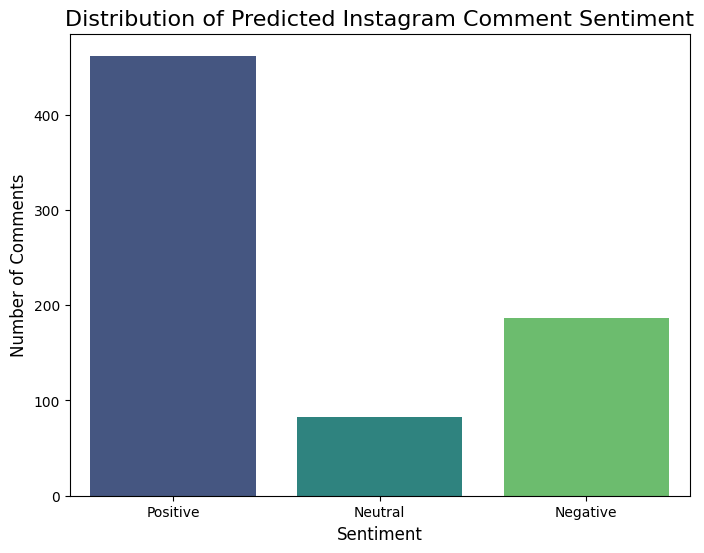

In [11]:
# --- 3. Preprocess and Standardize Ground Truth Labels ---
if not df.empty:
    print("\nStandardizing ground truth labels...")
    # Clean the labels by removing whitespace
    df['sentiment_ground_truth'] = df['sentiment_ground_truth'].str.strip()

    # Define a mapping from the many specific emotions to three categories
    def map_sentiment(sentiment):
        positive_list = ['Positive', 'Happy', 'Love', 'Joy', 'Excitement', 'Gratitude', 'Hopeful', 'Contentment', 'Inspired', 'Amusement', 'Elation', 'Serenity', 'Adoration', 'Amazement', 'Awe', 'Celebration', 'Confidence', 'Determination', 'Empowerment', 'Enthusiasm', 'Euphoria', 'Freedom', 'Fulfillment', 'Grateful', 'Harmony', 'Hope', 'Inspiration', 'Kindness', 'Optimism', 'Pride', 'Relief', 'Satisfaction', 'Success', 'Triumph', 'Wonder']
        negative_list = ['Negative', 'Sad', 'Anger', 'Fear', 'Disgust', 'Anxiety', 'Betrayal', 'Bitter', 'Bitterness', 'Despair', 'Disappointment', 'Frustration', 'Grief', 'Hate', 'Heartbreak', 'Loneliness', 'Regret', 'Sorrow', 'Suffering', 'Yearning', 'Bad', 'Devastated', 'Exhaustion', 'Helplessness', 'Numbness', 'Shame']

        if sentiment in positive_list:
            return 'Positive'
        elif sentiment in negative_list:
            return 'Negative'
        else:
            # All other nuanced or ambiguous emotions will be considered Neutral
            return 'Neutral'

    # Apply the mapping to the ground truth column
    df['sentiment_ground_truth'] = df['sentiment_ground_truth'].apply(map_sentiment)
    print("Standardization complete.")


# --- 4. Perform Sentiment Analysis ---
if not df.empty and 'comment' in df.columns:
    # Initialize the VADER Sentiment Analyzer
    sia = SentimentIntensityAnalyzer()

    # Define a function to get the sentiment score
    def get_vader_sentiment(comment):
        if not isinstance(comment, str):
            return 'Neutral'
        score = sia.polarity_scores(comment)['compound']
        if score > 0.05:
            return 'Positive'
        elif score < -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    # Apply the function to the 'comment' column
    print("\nAnalyzing sentiment of comments using VADER...")
    df['sentiment_predicted'] = df['comment'].apply(get_vader_sentiment)
    print("Sentiment analysis complete.")

    # --- 5. Evaluate Model Performance ---
    accuracy = accuracy_score(df['sentiment_ground_truth'], df['sentiment_predicted'])
    print("\n--- VADER Model Evaluation ---")
    print(f"Overall Accuracy: {accuracy:.2%}")
    print("\n--- Classification Report ---")
    print(classification_report(df['sentiment_ground_truth'], df['sentiment_predicted'], zero_division=0))


    # --- 6. Visualize the Results ---
    print("\n--- Predicted Sentiment Distribution ---")
    print(df['sentiment_predicted'].value_counts())

    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='sentiment_predicted', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
    ax.set_title('Distribution of Predicted Instagram Comment Sentiment', fontsize=16)
    ax.set_xlabel('Sentiment', fontsize=12)
    ax.set_ylabel('Number of Comments', fontsize=12)
    plt.show()

else:
    print("\nCould not perform analysis because the dataframe is empty or missing the 'comment' column.")

